In [27]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import cross_validate, train_test_split
import pandas as pd
from scipy.io import loadmat, savemat
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
FiveClassTrainingData = loadmat('FiveClassTrainingData.mat')
FiveClassTestData = loadmat('FiveClassTestData.mat')

In [29]:
# Five Class Dataset
X_train = FiveClassTrainingData['X_train']
y_train = FiveClassTrainingData['y_train']

X_test = FiveClassTestData['X_test']
y_test = FiveClassTestData['y_test']

# Plot of the training data #

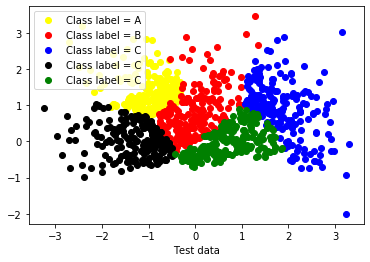

In [30]:

plt.plot(X_test[:200,0], X_test[:200,1], 'o', label='Class label = A', color='yellow')
plt.plot(X_test[200:400,0], X_test[200:400,1], 'o', label='Class label = B', color='red')
plt.plot(X_test[400:600,0], X_test[400:600,1], 'o', label='Class label = C', color='blue')
plt.plot(X_test[600:800,0], X_test[600:800,1], 'o', label='Class label = C', color='black')
plt.plot(X_test[800:,0], X_test[800:,1], 'o', label='Class label = C', color='green')
plt.xlabel("Test data")
plt.legend(numpoints=1)

# Split training data for every class to train the binary classifers for each set of 2 classes #

In [31]:

# Class 1
X_train1 = X_train[:800,:]
y_train1 = y_train[:800,:]

# Class 2
X_train2 = X_train[800:1600,:]
y_train2 = y_train[800:1600,:]

# Class 3
X_train3 = X_train[1600:2400,:]
y_train3 = y_train[1600:2400,:]

# Class 4
X_train4 = X_train[2400:3200,:]
y_train4 = y_train[2400:3200,:]

# Class 5
X_train5 = X_train[3200:,:]
y_train5 = y_train[3200:,:]


## Prepare the training data for 5 class classification taking 2 at a time ##

# For Class 1 and 2
X_train12 = np.vstack((X_train1, X_train2))
y_train12 = np.sign(np.vstack((y_train1, y_train2)) - 1.5*np.ones((1600,1)))

# For Class 1 and 3
X_train13 = np.vstack((X_train1, X_train3))
y_train13 = np.sign(np.vstack((y_train1, y_train3)) - 2*np.ones((1600,1)))

# For Class 1 and 4
X_train14 = np.vstack((X_train1, X_train4))
y_train14 = np.sign(np.vstack((y_train1, y_train4)) - 2.5*np.ones((1600,1)))

# For Class 1 and 5
X_train15 = np.vstack((X_train1, X_train5))
y_train15 = np.sign(np.vstack((y_train1, y_train5)) - 3*np.ones((1600,1)))

# For Class 2 and 3
X_train23 = np.vstack((X_train2, X_train3))
y_train23 = np.sign(np.vstack((y_train2, y_train3)) - 2.5*np.ones((1600,1)))

# For Class 2 and 4
X_train24 = np.vstack((X_train2, X_train4))
y_train24 = np.sign(np.vstack((y_train2, y_train4)) - 3*np.ones((1600,1)))

# For Class 2 and 5
X_train25 = np.vstack((X_train2, X_train5))
y_train25 = np.sign(np.vstack((y_train2, y_train5)) - 3.5*np.ones((1600,1)))

# For Class 3 and 4
X_train34 = np.vstack((X_train3, X_train4))
y_train34 = np.sign(np.vstack((y_train3, y_train4)) - 3.5*np.ones((1600,1)))

# For Class 3 and 5
X_train35 = np.vstack((X_train3, X_train5))
y_train35 = np.sign(np.vstack((y_train3, y_train5)) - 4*np.ones((1600,1)))

# For Class 4 and 5
X_train45 = np.vstack((X_train4, X_train5))
y_train45 = np.sign(np.vstack((y_train4, y_train5)) - 4.5*np.ones((1600,1)))


# Create and train the SVM models for DAGSVM and One-Vs-One #

In [32]:

start_train_time_dagsvm_ovo = time.time()

# For Class 1 and 2
svm12 = svm.SVC(kernel='linear')
svm12.fit(X_train12, y_train12)

# For Class 1 and 3
svm13 = svm.SVC(kernel='linear')
svm13.fit(X_train13, y_train13)

# For Class 1 and 4
svm14 = svm.SVC(kernel='linear')
svm14.fit(X_train14, y_train14)

# For Class 1 and 5
svm15 = svm.SVC(kernel='linear')
svm15.fit(X_train15, y_train15)

# For Class 2 and 3
svm23 = svm.SVC(kernel='linear')
svm23.fit(X_train23, y_train23)

# For Class 2 and 4
svm24 = svm.SVC(kernel='linear')
svm24.fit(X_train24, y_train24)

# For Class 2 and 5
svm25 = svm.SVC(kernel='linear')
svm25.fit(X_train25, y_train25)

# For Class 3 and 4
svm34 = svm.SVC(kernel='linear')
svm34.fit(X_train34, y_train34)

# For Class 3 and 5
svm35 = svm.SVC(kernel='linear')
svm35.fit(X_train35, y_train35)

# For Class 4 and 5
svm45 = svm.SVC(kernel='linear')
svm45.fit(X_train45, y_train45)

end_train_time_dagsvm_ovo = time.time()

total_train_time_dagsvm_ovo =  end_train_time_dagsvm_ovo - start_train_time_dagsvm_ovo

/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when 

# Testing DAGSVM model for classification #

In [33]:

y_test_hat_dagsvm = np.zeros((y_test.shape))

start_test_time_dagsvm = time.time()
for i in range(y_test.shape[0]):
    
    # classifier for 1v5
    if svm15.predict(X_test[i:i+1]) == 1:
        
        # classifier for 2v5
        if svm25.predict(X_test[i:i+1]) == 1:
            
            # classifier for 3v5
            if svm35.predict(X_test[i:i+1]) == 1:
                
                # classifier for 4v5
                if svm45.predict(X_test[i:i+1]) == 1:
                    y_test_hat_dagsvm[i] = 5
                else:
                    y_test_hat_dagsvm[i] = 4
            else:
                
                # classifier for 3v4
                if svm34.predict(X_test[i:i+1]) == 1:
                    y_test_hat_dagsvm[i] = 4
                else:
                    y_test_hat_dagsvm[i] = 3
        else:
            
            # classifier for 2v4
            if svm24.predict(X_test[i:i+1]) == 1:
                
                # classifier for 3v4
                if svm34.predict(X_test[i:i+1]) == 1:
                    y_test_hat_dagsvm[i] = 4
                else:
                    y_test_hat_dagsvm[i] = 3
            else:
                
                #classifier for 2v3
                if svm23.predict(X_test[i:i+1]) == 1:
                    y_test_hat_dagsvm[i] = 3
                else:
                    y_test_hat_dagsvm[i] = 2
    else:
        
        # classifier for 1v4
        if svm14.predict(X_test[i:i+1]) == 1:
            
            # classifier for 2v4
            if svm24.predict(X_test[i:i+1]) == 1:
                
                # classifier for 3v4
                if svm45.predict(X_test[i:i+1]) == 1:
                    y_test_hat_dagsvm[i] = 4
                else:
                    y_test_hat_dagsvm[i] = 3
            else:
                
                # classifier for 2v3
                if svm23.predict(X_test[i:i+1]) == 1:
                    y_test_hat_dagsvm[i] = 3
                else:
                    y_test_hat_dagsvm[i] = 2
        else:
            
            # classifier for 1v3
            if svm13.predict(X_test[i:i+1]) == 1:
                
                # classifier for 2v3
                if svm23.predict(X_test[i:i+1]) == 1:
                    y_test_hat_dagsvm[i] = 3
                else:
                    y_test_hat_dagsvm[i] = 2
            else:
                
                #classifier for 1v2
                if svm12.predict(X_test[i:i+1]) == 1:
                    y_test_hat_dagsvm[i] = 2
                else:
                    y_test_hat_dagsvm[i] = 1

end_test_time_dagsvm = time.time()
total_test_time_dagsvm = end_test_time_dagsvm - start_test_time_dagsvm
                    
error_vec_dagsvm = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test_hat_dagsvm, y_test))]

error_rate_dagsvm = sum(error_vec_dagsvm)/y_test_hat_dagsvm.shape[0]

print("Number of errors are: " + str(sum(error_vec_dagsvm)) + " and error_rate is: " + str(error_rate_dagsvm))
print("Total time for training for DAGSVM is: " + str(total_train_time_dagsvm_ovo))
print("Total time for testing of DAGSVM is: " + str(total_test_time_dagsvm))

Number of errors are: 177 and error_rate is: 0.177
Total time for training for DAGSVM is: 0.0424802303314209
Total time for testing of DAGSVM is: 0.23137378692626953


# Testing one-vs-one method for classification #

In [34]:

# Here we test all the classifers before hand

start_test_time_ovo = time.time()
y_test_hat_ovo = np.zeros((y_test.shape))

for i in range(y_test_hat_ovo.shape[0]):
    
    # Predicition for 1 and 2
    y_test_hat_1 = svm12.predict(X_test[i:i+1])

    # Predicition for 1 and 3
    y_test_hat_2 = svm13.predict(X_test[i:i+1])

    # Predicition for 1 and 4
    y_test_hat_3 = svm14.predict(X_test[i:i+1])

    # Predicition for 1 and 5
    y_test_hat_4 = svm15.predict(X_test[i:i+1])

    # Predicition for 2 and 3
    y_test_hat_5 = svm23.predict(X_test[i:i+1])

    # Predicition for 2 and 4
    y_test_hat_6 = svm24.predict(X_test[i:i+1])

    # Predicition for 2 and 5
    y_test_hat_7 = svm25.predict(X_test[i:i+1])

    # Predicition for 3 and 4
    y_test_hat_8 = svm34.predict(X_test[i:i+1])

    # Predicition for 3 and 5
    y_test_hat_9 = svm35.predict(X_test[i:i+1])

    # Predicition for 4 and 5
    y_test_hat_10 = svm45.predict(X_test[i:i+1])
    
    # This is like a voting system to decide which class the prediction will be classified as!!
    
    if (y_test_hat_1 == -1) and (y_test_hat_2 == -1) and (y_test_hat_3 == -1) and (y_test_hat_4 == -1):
        y_test_hat_ovo[i,0] = 1
        
    elif (y_test_hat_1 == 1) and (y_test_hat_5 == -1) and (y_test_hat_6 == -1) and (y_test_hat_7 == -1):
        y_test_hat_ovo[i,0] = 2
        
    elif (y_test_hat_2 == 1) and (y_test_hat_5 == 1) and (y_test_hat_8 == -1) and (y_test_hat_9 == -1):
        y_test_hat_ovo[i,0] = 3
        
    elif (y_test_hat_3 == 1) and (y_test_hat_6 == 1) and (y_test_hat_8 == 1) and (y_test_hat_10 == -1):
        y_test_hat_ovo[i,0] = 4
        
    elif (y_test_hat_4 == 1) and (y_test_hat_7 == 1) and (y_test_hat_9 == 1) and (y_test_hat_10 == 1):
        y_test_hat_ovo[i,0] = 5


end_test_time_ovo = time.time()
total_test_time_ovo = end_test_time_ovo - start_test_time_ovo        

error_vec_ovo = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test_hat_ovo, y_test))]

error_rate_ovo = sum(error_vec_ovo)/y_test_hat_ovo.shape[0]

print("Number of errors are: " + str(sum(error_vec_ovo)) + " and error_rate is: " + str(error_rate_ovo))
print("Total time for training for One-against-One is: " + str(total_train_time_dagsvm_ovo))
print("Total time for testing for One-against-One is: " + str(total_test_time_ovo))

Number of errors are: 60 and error_rate is: 0.06
Total time for training for One-against-One is: 0.0424802303314209
Total time for testing for One-against-One is: 0.5099871158599854


# Prepare training data for Binary Tree SVM #

In [35]:

# For class 1,2,3 and 4,5
X_train12345 = np.vstack((X_train1, X_train2, X_train3, X_train4, X_train5))
y_train12345 = np.sign(np.vstack((y_train1, y_train2, y_train3, y_train4, y_train5)) - 3.5*np.ones((4000,1)))

# For class 1,2 and 3
X_train123 = np.vstack((X_train1, X_train2, X_train3))
y_train123 = np.sign(np.vstack((y_train1, y_train2, y_train3)) - 2.5*np.ones((2400,1)))

# For class 4 and 5
X_train45 = np.vstack((X_train4, X_train5))
y_train45 = np.sign(np.vstack((y_train4, y_train5)) - 4.5*np.ones((1600,1)))

# For class 1 and 2
X_train12 = np.vstack((X_train1, X_train2))
y_train12 = np.sign(np.vstack((y_train1, y_train2)) - 1.5*np.ones((1600,1)))


# Create and train the SVM Models for Binary Tree classification #

In [36]:

start_train_time_bt = time.time()

# For Class 1,2,3 and 4,5
svm12345 = svm.SVC(kernel='linear')
svm12345.fit(X_train12345, y_train12345)

# For Class 1,2 and 3
svm123 = svm.SVC(kernel='linear')
svm123.fit(X_train123, y_train123)

# For Class 4 and 5
svm45 = svm.SVC(kernel='linear')
svm45.fit(X_train45, y_train45)

# For Class 1 and 2
svm12 = svm.SVC(kernel='linear')
svm12.fit(X_train12, y_train12)

end_train_time_bt = time.time()
total_train_time_bt = end_train_time_bt - start_train_time_bt

/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when 

# Testing Binary Tree SVM model for classification #

In [37]:

y_test_hat_bt = np.zeros((y_test.shape))

start_test_time_bt = time.time()

for i in range(y_test.shape[0]):
     # classifier for 123 v/s 45
    if svm12345.predict(X_test[i:i+1]) == 1:
        
        # classifier for 4 v/s 5
        if svm45.predict(X_test[i:i+1]) == 1:
            y_test_hat_bt[i] = 5
        else:
            y_test_hat_bt[i] = 4
    else:
        # classifier for 12 v/s 3
        if svm123.predict(X_test[i:i+1]) == 1:
            y_test_hat_bt[i] = 3
        else:
            # classifier for 1 v/s 2
            if svm12.predict(X_test[i:i+1]) == 1:
                y_test_hat_bt[i] = 2
            else:
                y_test_hat_bt[i] = 1
                

end_test_time_bt = time.time()
total_test_time_bt = end_test_time_bt - start_test_time_bt


error_vec_bt = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test_hat_bt, y_test))]

error_rate_bt = sum(error_vec_bt)/y_test_hat_bt.shape[0]

print("Number of errors are: " + str(sum(error_vec_bt)) + " and error_rate is: " + str(error_rate_bt))
print("Total time for training of Binary Tree method is: " + str(total_train_time_bt))
print("Total time for testing of Binary Tree method is: " + str(total_test_time_bt))

Number of errors are: 194 and error_rate is: 0.194
Total time for training of Binary Tree method is: 0.14087486267089844
Total time for testing of Binary Tree method is: 0.14333105087280273
